In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [3]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_20_50_10.csv'

In [4]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [5]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [6]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [7]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,...,hetChrom_10_volume,random_10_volume,hetChrom_10perc_ch1,random_10perc_ch1,hetChrom_10perc_ch2,random_10perc_ch2,hetChrom_10perc_ch3,random_10perc_ch3,age_track,day
0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,...,45987.0,46247.0,6.366278e+08,281528813.0,174067475.0,131640512.0,1.352231e+09,1.043517e+09,0.666667,d20190625
1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,...,43651.0,43924.0,5.861875e+08,266516067.0,162411790.0,128299406.0,1.353023e+09,1.065184e+09,0.666667,d20190625
2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,...,39698.0,39812.0,6.928624e+08,318905411.0,194622718.0,148176740.0,1.366670e+09,1.118365e+09,2.000000,d20190625
3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,...,42159.0,41848.0,6.473978e+08,285348983.0,195376713.0,139563277.0,1.298882e+09,1.038559e+09,2.000000,d20190625
4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,...,81411.0,81271.0,1.506281e+09,698512214.0,248463390.0,183210463.0,2.583220e+09,2.158853e+09,19.500000,d20190625


### Percentile volume test

We segmented the images by choosing n% of the brightest pixels in hetChrom channel (HP1B or H3K9Me3). Heterochromatin defined in this way should constitute n% volume of the nucleus.

<IPython.core.display.Javascript object>


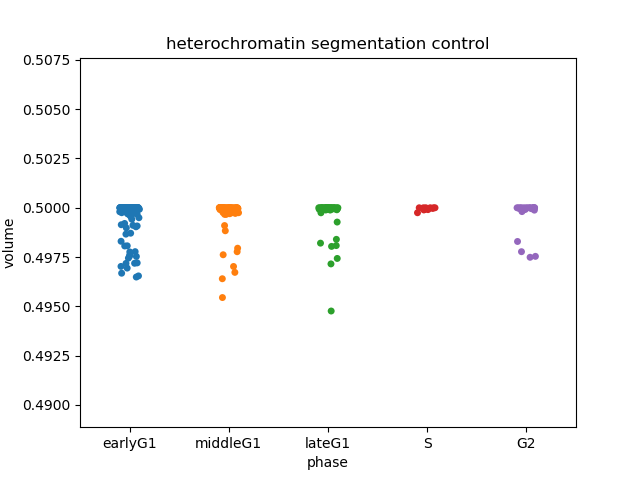

Text(0.5, 1.0, 'heterochromatin segmentation control')

In [41]:
%matplotlib notebook

myData['temp']=myData.hetChrom_50_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("heterochromatin segmentation control")

<IPython.core.display.Javascript object>


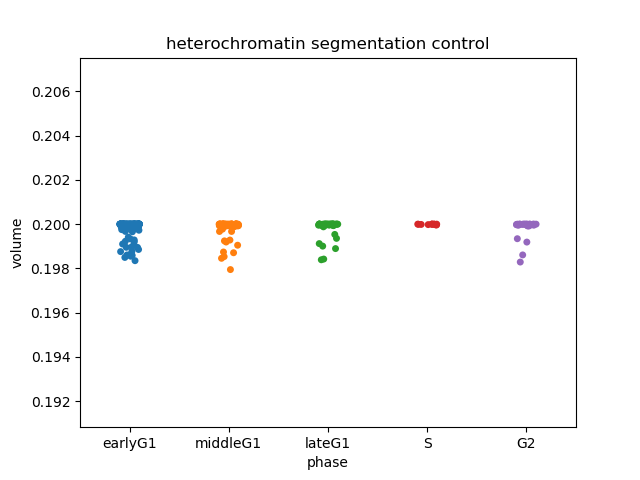

Text(0.5, 1.0, 'heterochromatin segmentation control')

In [97]:
%matplotlib notebook

myData['temp']=myData.hetChrom_20_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("heterochromatin segmentation control")

Control masks were generated by choosing n% of random pixels within a nucleus.

<IPython.core.display.Javascript object>


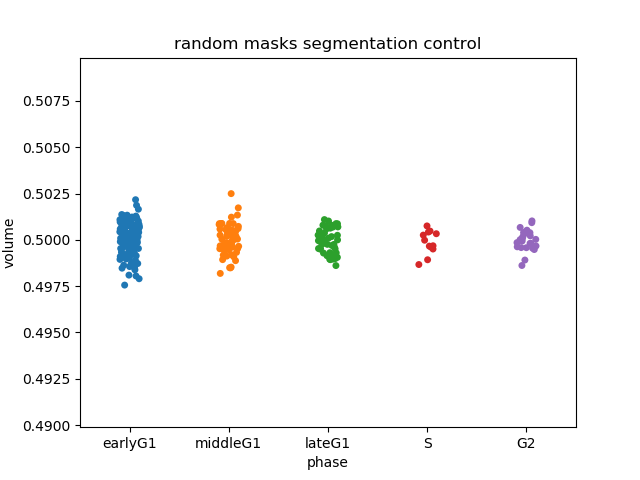

Text(0.5, 1.0, 'random masks segmentation control')

In [42]:
%matplotlib notebook

myData['temp']=myData.random_50_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("random masks segmentation control")

<IPython.core.display.Javascript object>


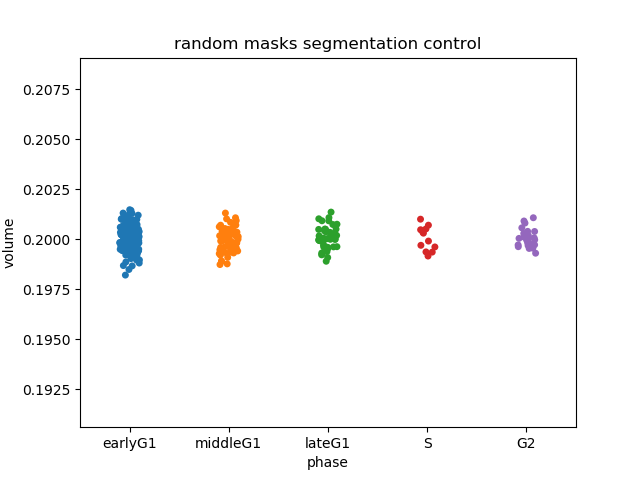

Text(0.5, 1.0, 'random masks segmentation control')

In [98]:
%matplotlib notebook

myData['temp']=myData.random_20_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("random masks segmentation control")

#### why does these two plot show difference in volume when it is the same '50%'?

In [96]:
myData['temp']=myData.hetChrom_50_volume/myData.nucleus_Otsu_volume
np.mean(myData['temp'])

0.49960813869803306

In [95]:
myData['temp']=myData.random_50_volume/myData.nucleus_Otsu_volume
np.mean(myData['temp'])

0.5000442868926188

# deconvoled cells

### Count cells in different phases

The same cells appear double in the dataset (as deconvolved and not deconvolved), but they have to be analyzed separately. Staining of heterochromatin looks different with different markers, so I include only HP1B in the first phase of the analysis.

Cell numbers in different categories:

In [10]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSel['category'].value_counts()

earlyG1     58
middleG1    27
lateG1      20
G2          10
S            4
Name: category, dtype: int64

## 20% brightest pixels

### Total MCM loading

Density of MCM loading should increase in G1 and be lowest in G2.

The graph below:

- has the correct trend (increase in G1)
- shows that data from different days of experiments were stored in different formats (so it is not possible to compare absolute values)
- there is no difference in absolute MCM signal between G1 and G2 cells

<IPython.core.display.Javascript object>


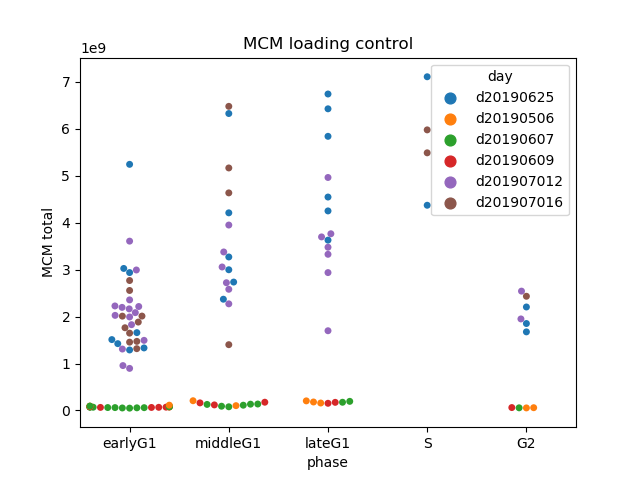

Text(0.5, 1.0, 'MCM loading control')

In [11]:
%matplotlib notebook

myDataSel['temp']=myDataSel.nucleus_Otsu_ch2
sn.swarmplot(x='category', y = 'temp', data=myDataSel,
             order=[ "earlyG1", "middleG1", "lateG1","S","G2"],hue='day')

plt.ylabel("MCM total")
plt.xlabel("phase")
plt.title("MCM loading control")

MCM signal normalized by total DAPI signal:

- corrects for major differnces between days of experiments (but there might be a small trend remaining)
- normalized MCM loading is now lower for G2 cells than early G1 cells (it's fair to conclude that majority of early G1 cells is above background because in total MCM signal G2 cells have artificially higher signal because of having bigger volume)

<IPython.core.display.Javascript object>


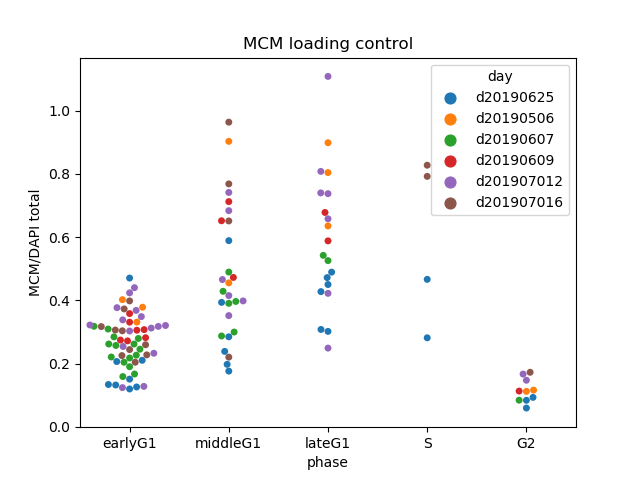

Text(0.5, 1.0, 'MCM loading control')

In [12]:
%matplotlib notebook

myDataSel['temp']=myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3
sn.swarmplot(x='category', y = 'temp', data=myDataSel,
             order=[ "earlyG1", "middleG1", "lateG1","S","G2"],hue='day')

plt.ylabel("MCM/DAPI total")
plt.xlabel("phase")
plt.title("MCM loading control")

### Characterization of heterochromatin 

Density of DAPI in heterochromatin pixels. As expected pixels identified as heterochromatin (by HP1B) show higher DAPI signal than the average of the nucleus. 

I don't see a strong trend between the phases.

#### 20% pixels - DAPI/volume by phases (DAPI density)

<IPython.core.display.Javascript object>


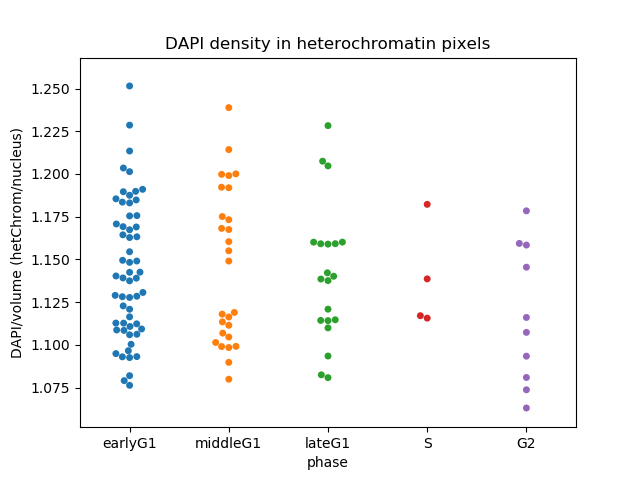

Text(0.5, 1.0, 'DAPI density in heterochromatin pixels')

In [13]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)/(myDataSel.hetChrom_20_volume/myDataSel.nucleus_Otsu_volume)
sn.swarmplot(x='category', y = 'temp', data=myDataSel,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("DAPI/volume (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("DAPI density in heterochromatin pixels")

MCM loading of heterochromatin pixels:

#### 20% pixels - MCM/volume by phase (MCM density)

<IPython.core.display.Javascript object>


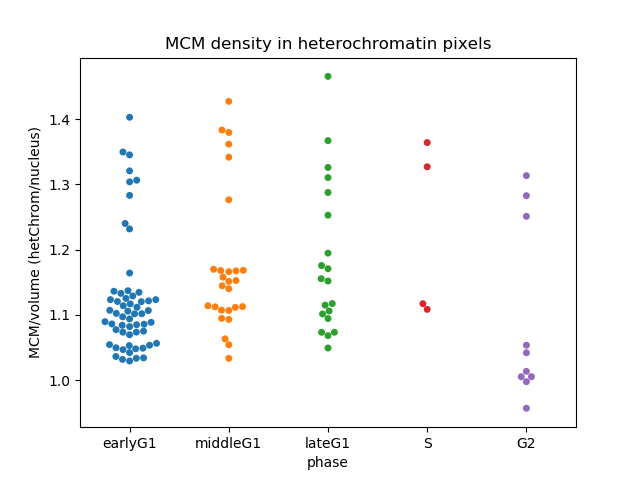

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [14]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20_volume/myDataSel.nucleus_Otsu_volume)
sn.swarmplot(x='category', y = 'temp', data=myDataSel,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM/volume (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("MCM density in heterochromatin pixels")

Comments on the above graph:

- above graph doesn't show clear trend
- but the distributions are broad and maybe even suggest presence of two groups 
- does it correlate with the day of an experiment?
- MCM loading in heterochromatin seems always denser than on average in the nucleus
- but heterochromatin pixels have also more DNA content, so DAPI density may be more appropriate control

Firstly, let's get information about days of imaging:

#### 20% pixels - MCM/volume by phase, color by day (MCM density)

<IPython.core.display.Javascript object>


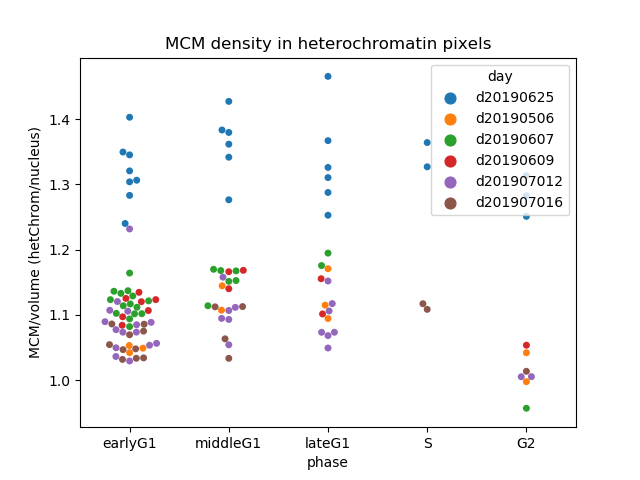

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [15]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20_volume/myDataSel.nucleus_Otsu_volume)
sn.swarmplot(x='category', y = 'temp', data=myDataSel,order=[ "earlyG1", "middleG1", "lateG1","S","G2"],hue='day')
plt.ylabel("MCM/volume (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("MCM density in heterochromatin pixels")

Clearly there is a bias in mean between days of imaging, let's look specifically at G1 phase:

#### 20% pixels - MCM/volume by G1 phases (color by day) [MCM density]

<IPython.core.display.Javascript object>


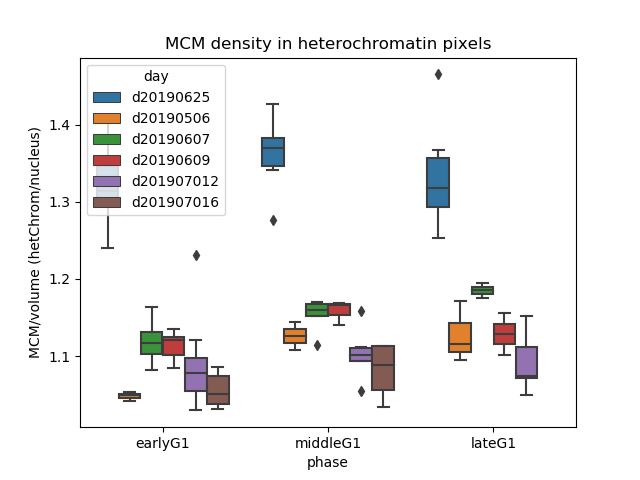

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [16]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20_volume/myDataSel.nucleus_Otsu_volume)
sn.boxplot(x='category', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],
             order=[ "earlyG1", "middleG1", "lateG1"],hue='day')
plt.ylabel("MCM/volume (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("MCM density in heterochromatin pixels")

Cells imaged on 20190625 show clearly much more MCM. Let's discard this day from the analysis:
#### 20% pixels - MCM/volume by G1 phases (color by day) [MCM density] (excluded d20190625)

<IPython.core.display.Javascript object>


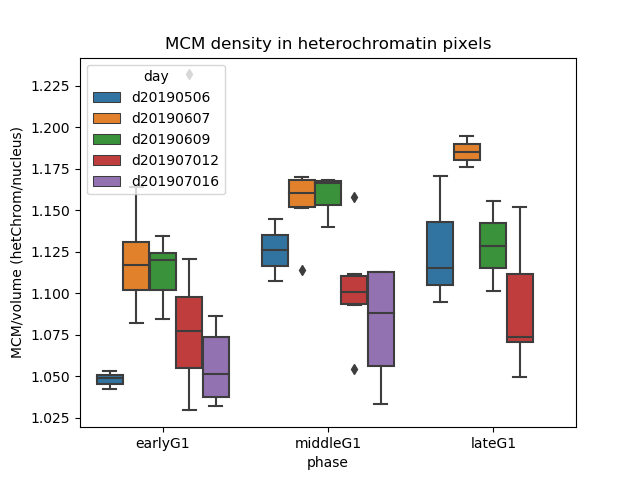

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [17]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20_volume/myDataSel.nucleus_Otsu_volume)
sn.boxplot(x='category', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & 
                                                           ['G1' in x for x in myDataSel.category]),:],
             order=[ "earlyG1", "middleG1", "lateG1"],hue='day')
plt.ylabel("MCM/volume (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("MCM density in heterochromatin pixels")

Many of the days show increase in G1.

Let's look how MCM loading in heterochromatin looks normalized to DAPI density:

#### 20% pixels - MCM/DAPI by G1 phases (color by day) [MCM density] (excluded d2019025)

<IPython.core.display.Javascript object>


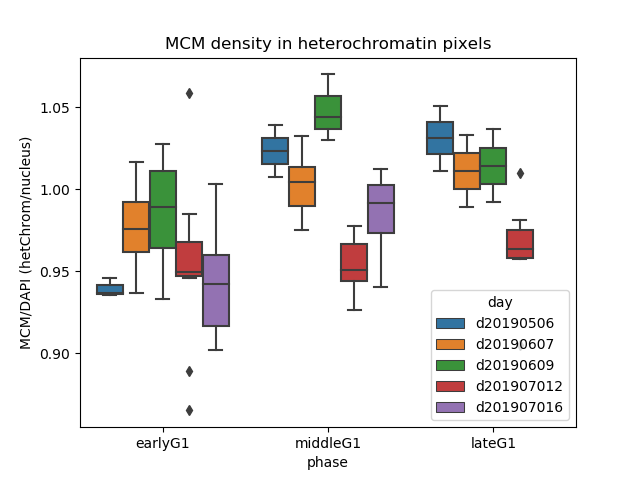

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [18]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.boxplot(x='category', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & 
                                                           ['G1' in x for x in myDataSel.category]),:],
             order=[ "earlyG1", "middleG1", "lateG1"],hue='day')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("phase")
plt.title("MCM density in heterochromatin pixels")

The graph above suggests that in early G1 the ration of MCM/DAPI in heterochromatin is lower than in euchromatin but later in G1 matches or even slightly exceeds euchromatin.

## physical and molecular age

Let's use information about the physical and molecular age of the cells:
### 20% pixels - MCM/DAPI vs physical age (color by category within G1)

<IPython.core.display.Javascript object>


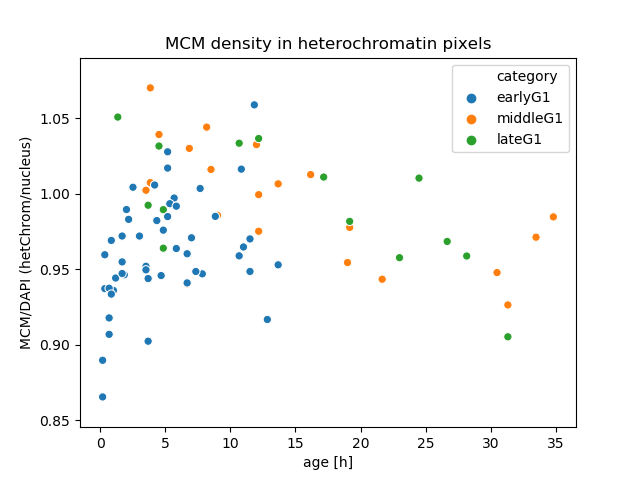

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [19]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & 
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("age [h]")
plt.title("MCM density in heterochromatin pixels")

Observation - in healthy RPE cells there shouldn't be cells spending so much time in G1 phase. 

Were they included in this dataset on purpose?

Do they come from a specific day of an experiment?

### color by days (20% pixel - MCM/DAPI vs physical age)

<IPython.core.display.Javascript object>


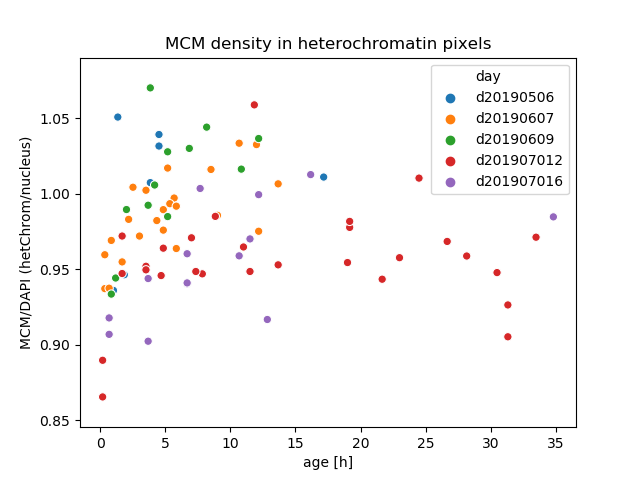

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [20]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & 
                                                           ['G1' in x for x in myDataSel.category]),:],hue='day')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("age [h]")
plt.title("MCM density in heterochromatin pixels")

Majority of them were imaged on 20190712, so I choose to discard this day and the data look like:

### 20% pixels -  physical age vs MCM/DAPI  (excluded d20190625, d20190712)

<IPython.core.display.Javascript object>


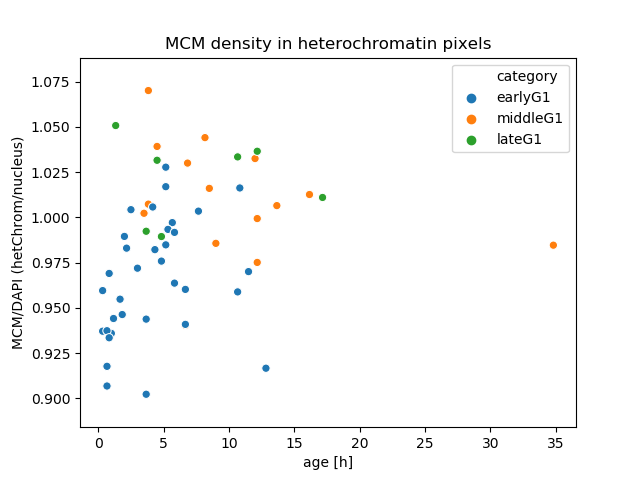

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [21]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("age [h]")
plt.title("MCM density in heterochromatin pixels")

It still contains some exceptionally long G1 dwellers, but it looks like we have a trend.

How does it depend on the molecular age?

Molecular age (DHB signal) has to be corrected because it's not possible to measure it in very young cells. 

Arbitrarily, I change DHB signal in cells described as early G1 and younger than 1.5h to the low observed value:
## Molecular age

#### molecular age modification (deconvolved)
We ran into a problem where younger cells (with low physical age and in category of 'earlyG1') having higher molecular age, which were therefore influencing our regression model.

Initially, we assigned those cells' molecular age to '0.3'.


In [22]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=0.3

### MCM/DAPI vs Molecular age

<IPython.core.display.Javascript object>


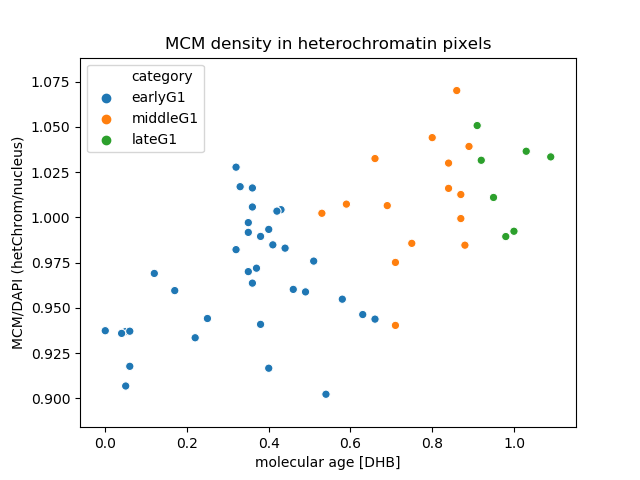

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [24]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

### Statistical analysis of this relationship:

<IPython.core.display.Javascript object>


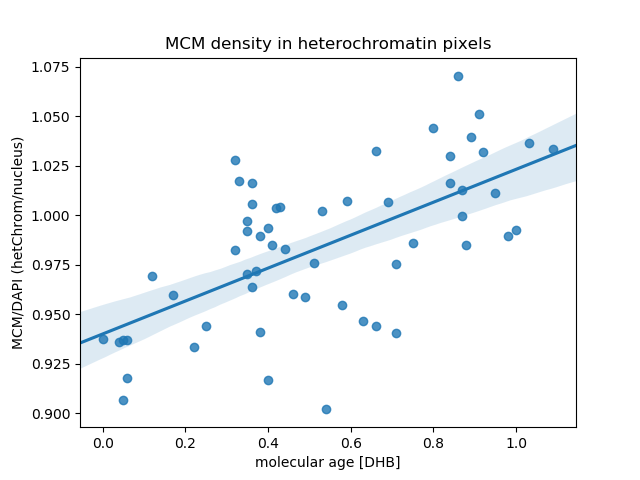

In [25]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [26]:
myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),'category'].value_counts()

earlyG1     35
middleG1    15
lateG1       7
Name: category, dtype: int64

In [27]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.038381068575522245, intercept=0.9766390202489212, rvalue=0.19627860195267557, pvalue=0.03240306902698593, stderr=0.017726382153828667)

In [28]:
r_value**2

0.03852528958449686

The effect is small but seems to be significant.

### control 20% pixels (random)
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


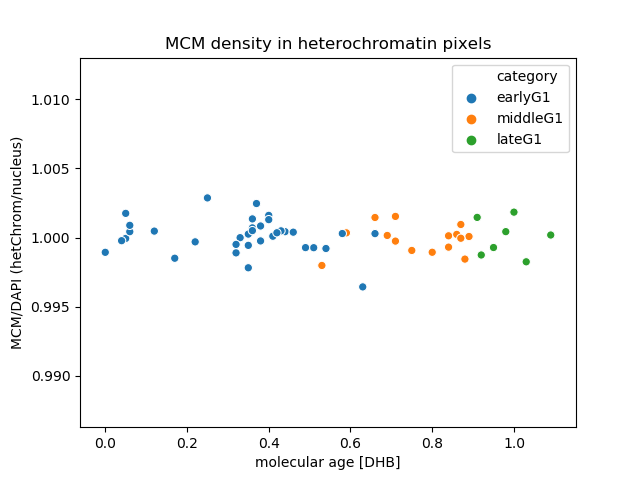

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.random_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.random_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

## 50% brightest pixels
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


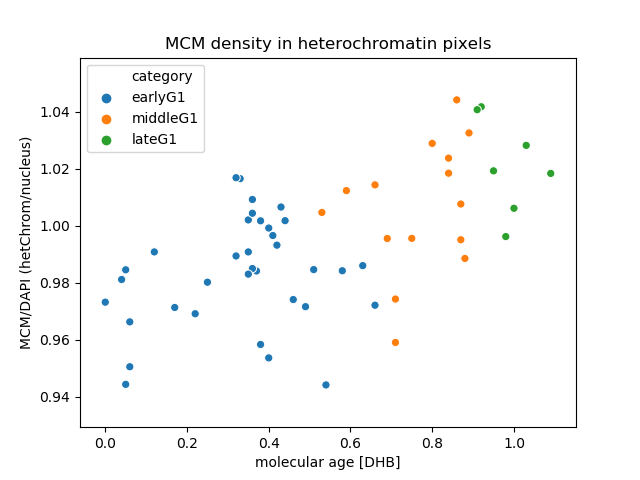

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [32]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_50perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_50perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


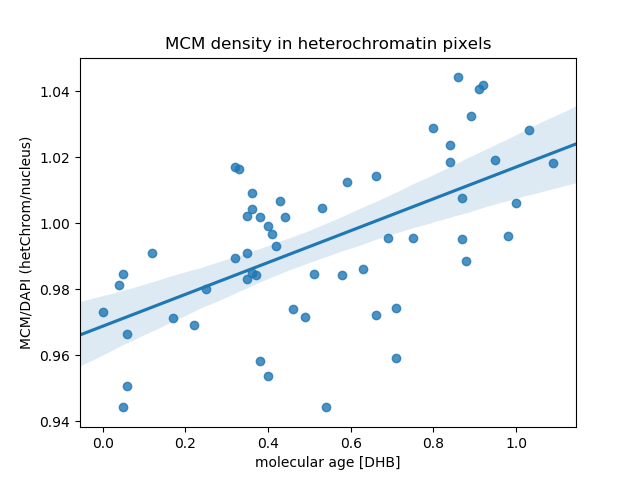

In [33]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_50perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_50perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [34]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.02615614694183704, intercept=0.9933880918007528, rvalue=0.17503289483999104, pvalue=0.056916073160613416, stderr=0.013602053864839864)

### Control in random 50%pixels:
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


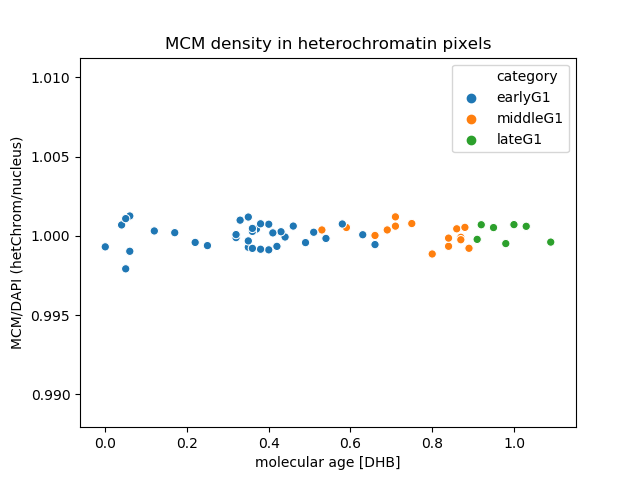

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [35]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.random_50perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.random_50perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

## 10% brightest pixels

<IPython.core.display.Javascript object>


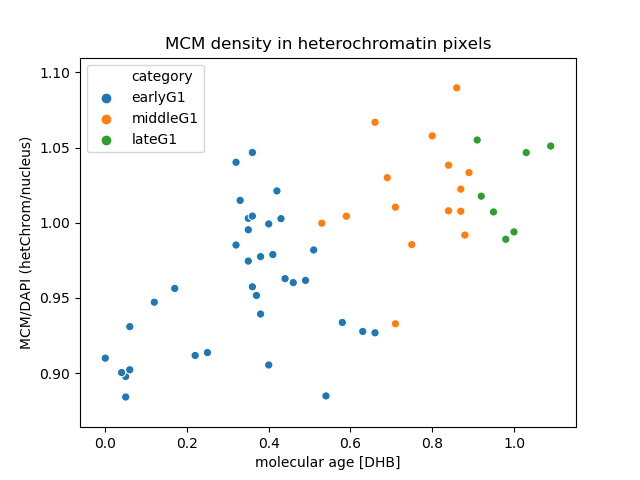

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [37]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_10perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_10perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


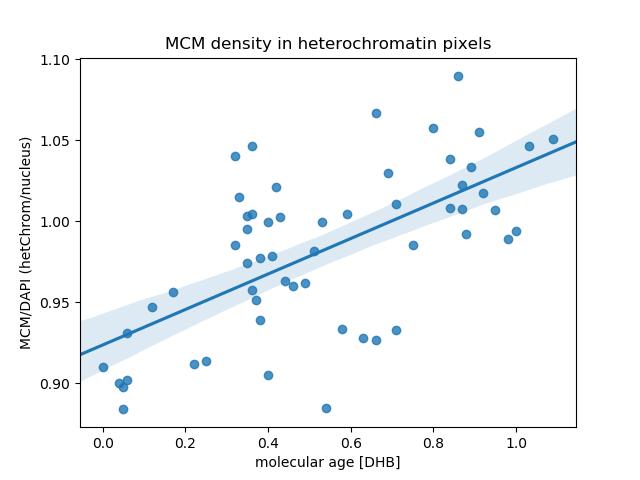

In [38]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_10perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_10perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [39]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.04758693864399613, intercept=0.9683913204039934, rvalue=0.2148310870170091, pvalue=0.01896296436977007, stderr=0.020000332074183502)

<IPython.core.display.Javascript object>


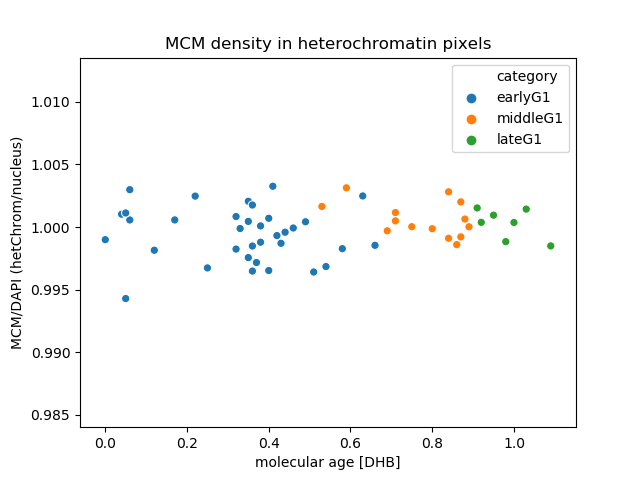

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [40]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.random_10perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.random_10perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [41]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.0008115571373809259, intercept=0.999525687262431, rvalue=0.1537987201190168, pvalue=0.09492168077281181, stderr=0.00048203138354478096)

# not deconvoled

## 20% brightest pixels

In [42]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=0.3

<IPython.core.display.Javascript object>


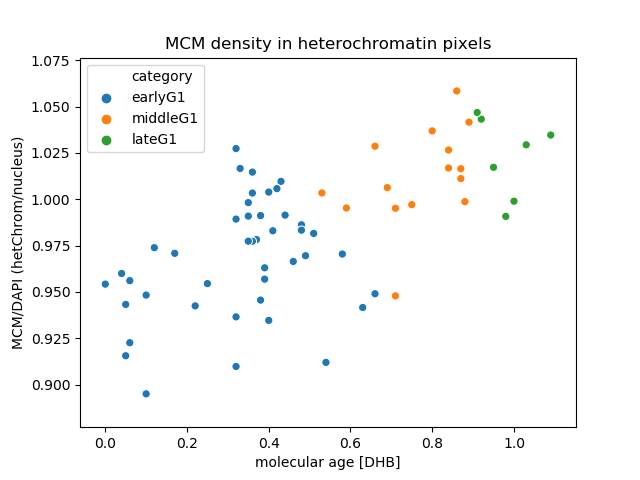

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [44]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

### control 20% pixels (random)
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


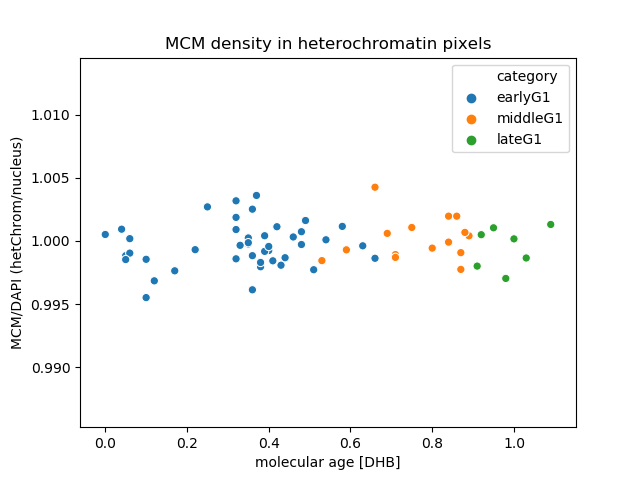

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [45]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.random_20perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.random_20perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

## 50% brightest pixels
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


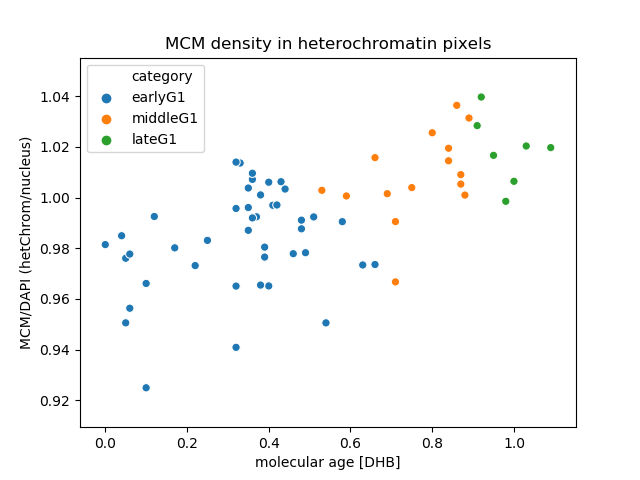

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [46]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_50perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_50perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [47]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.027912089616366324, intercept=0.9886278133303036, rvalue=0.22323456641734374, pvalue=0.01164338052857418, stderr=0.010901235433025815)

### Control in random 50%pixels:
fixed myDataSel to myDataSelnd

<IPython.core.display.Javascript object>


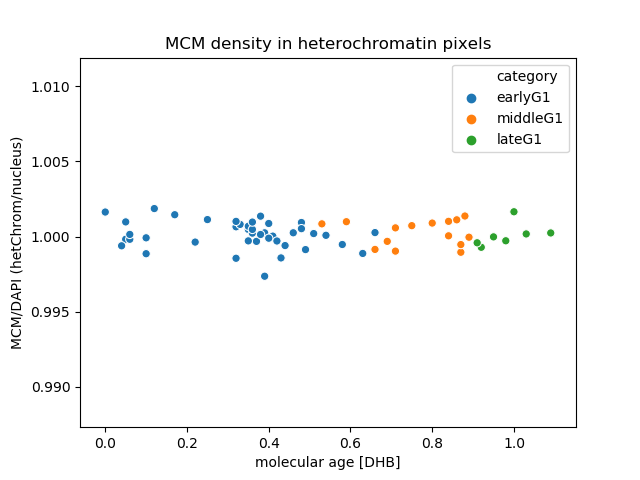

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [48]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.random_50perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.random_50perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

## 10% brightest pixels

<IPython.core.display.Javascript object>


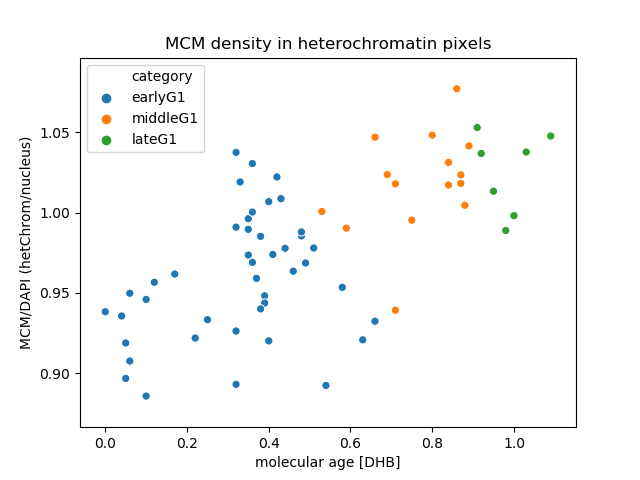

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [49]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_10perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_10perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [50]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.04638122943737008, intercept=0.9663066727093041, rvalue=0.24512089097201215, pvalue=0.005476782642073877, stderr=0.016407839025861497)

<IPython.core.display.Javascript object>


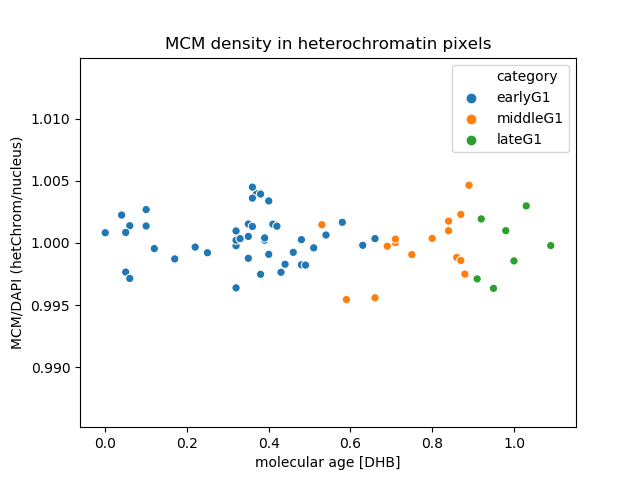

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [51]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.random_10perc_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.random_10perc_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [52]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=-0.0006166431848059798, intercept=1.0003193813724798, rvalue=-0.12029700807304569, pvalue=0.1779248130616719, stderr=0.00045515437964818923)